In [ ]:
!pip install pathway bokeh panel seaborn scikit-learn pandas numpy --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pathway as pw
import datetime
import panel as pn
import bokeh.plotting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv("/content/dataset.csv")

In [ ]:
# Preview the data
print(df.shape)
df.head()

(18368, 12)


,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      18368 non-null  int64  
 1   SystemCodeNumber        18368 non-null  object 
 2   Capacity                18368 non-null  int64  
 3   Latitude                18368 non-null  float64
 4   Longitude               18368 non-null  float64
 5   Occupancy               18368 non-null  int64  
 6   VehicleType             18368 non-null  object 
 7   TrafficConditionNearby  18368 non-null  object 
 8   QueueLength             18368 non-null  int64  
 9   IsSpecialDay            18368 non-null  int64  
 10  LastUpdatedDate         18368 non-null  object 
 11  LastUpdatedTime         18368 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


,0
ID,0
SystemCodeNumber,0
Capacity,0
Latitude,0
Longitude,0
Occupancy,0
VehicleType,0
TrafficConditionNearby,0
QueueLength,0
IsSpecialDay,0


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'], errors='coerce', dayfirst=True)
df = df.dropna(subset=['Timestamp'])

In [ ]:
df['PredictedPrice'] = 10 + (df['Occupancy'] / df['Capacity']) * 10
np.random.seed(42)
df['TruePrice'] = df['PredictedPrice'] * np.random.normal(1.0, 0.05, size=len(df))
df['TruePrice'] = df['TruePrice'].clip(5, 20)

In [ ]:
df['VehicleEncoded'] = LabelEncoder().fit_transform(df['VehicleType'].astype(str))
df['PriceCategory'] = pd.cut(df['TruePrice'], bins=[0, 8, 12, 20], labels=['Low', 'Medium', 'High'])

In [ ]:
features = ['Occupancy', 'Capacity', 'QueueLength', 'TrafficConditionNearby', 'IsSpecialDay', 'VehicleEncoded']
target = 'PriceCategory'

In [ ]:
X_raw = df[features]
y_raw = df[target].astype(str)

In [ ]:
print(df[features].dtypes)

Occupancy                  int64
Capacity                   int64
QueueLength                int64
TrafficConditionNearby    object
IsSpecialDay               int64
VehicleEncoded             int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the features
df_encoded = df[features].copy()

# Encode all object-type columns
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

In [ ]:
from sklearn.impute import SimpleImputer

# Combine with target
df_model = pd.concat([df_encoded, df['PriceCategory']], axis=1)

# Drop rows where target is missing
df_model = df_model.dropna(subset=['PriceCategory'])

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(df_model[features]), columns=features)

# Extract target
y = df_model['PriceCategory'].astype(str).reset_index(drop=True)
X = X.reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train-test split successful!")

Train-test split successful!


Decision Tree Accuracy: 93.39%


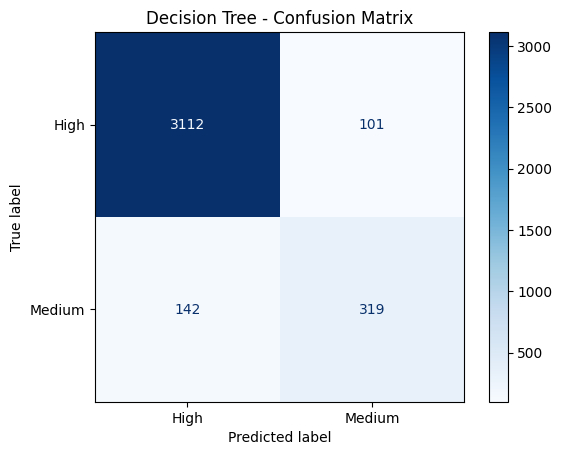

In [ ]:
from sklearn.tree import DecisionTreeClassifier

try:
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)
    dt_preds = dt_model.predict(X_test)
    dt_acc = accuracy_score(y_test, dt_preds)
    print(f"Decision Tree Accuracy: {dt_acc:.2%}")

    dt_labels = sorted(list(set(y_test) | set(dt_preds)))
    cm = confusion_matrix(y_test, dt_preds, labels=dt_labels)
    ConfusionMatrixDisplay(cm, display_labels=dt_labels).plot(cmap='Blues')
    plt.title("Decision Tree - Confusion Matrix")
    plt.show()
except Exception as e:
    print(f"Error in Decision Tree: {e}")

Logistic Regression Accuracy: 94.09%


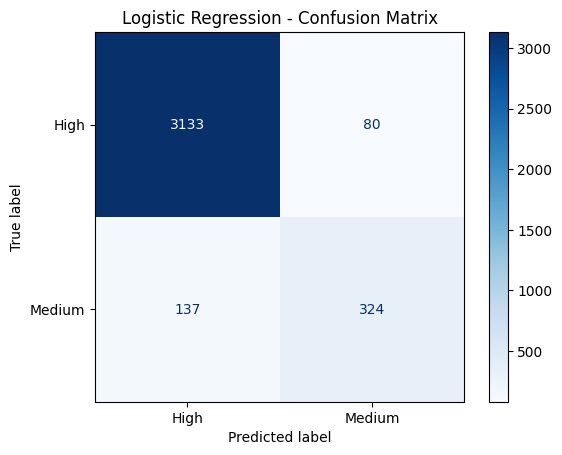

In [ ]:
from sklearn.linear_model import LogisticRegression

try:
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train, y_train)
    lr_preds = lr_model.predict(X_test)
    lr_acc = accuracy_score(y_test, lr_preds)
    print(f"Logistic Regression Accuracy: {lr_acc:.2%}")

    lr_labels = sorted(list(set(y_test) | set(lr_preds)))
    cm = confusion_matrix(y_test, lr_preds, labels=lr_labels)
    ConfusionMatrixDisplay(cm, display_labels=lr_labels).plot(cmap='Blues')
    plt.title("Logistic Regression - Confusion Matrix")
    plt.show()
except Exception as e:
    print(f"Error in Logistic Regression: {e}")

KNN Accuracy: 93.69%


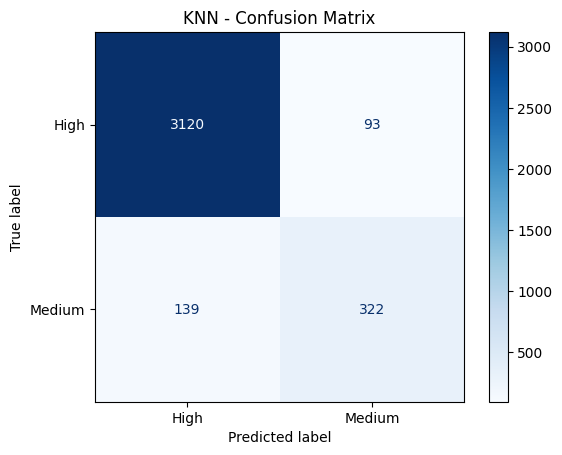

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

try:
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train, y_train)
    knn_preds = knn_model.predict(X_test)
    knn_acc = accuracy_score(y_test, knn_preds)
    print(f"KNN Accuracy: {knn_acc:.2%}")

    knn_labels = sorted(list(set(y_test) | set(knn_preds)))
    cm = confusion_matrix(y_test, knn_preds, labels=knn_labels)
    ConfusionMatrixDisplay(cm, display_labels=knn_labels).plot(cmap='Blues')
    plt.title("KNN - Confusion Matrix")
    plt.show()
except Exception as e:
    print(f"Error in KNN: {e}")

Naive Bayes Accuracy: 86.99%


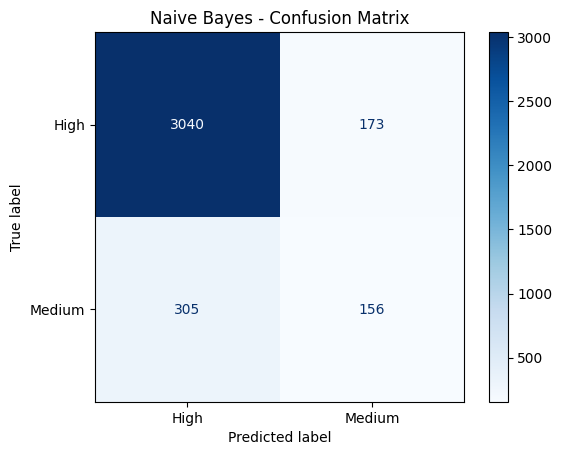

In [ ]:
from sklearn.naive_bayes import GaussianNB

try:
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    nb_acc = accuracy_score(y_test, nb_preds)
    print(f"Naive Bayes Accuracy: {nb_acc:.2%}")

    nb_labels = sorted(list(set(y_test) | set(nb_preds)))
    cm = confusion_matrix(y_test, nb_preds, labels=nb_labels)
    ConfusionMatrixDisplay(cm, display_labels=nb_labels).plot(cmap='Blues')
    plt.title("Naive Bayes - Confusion Matrix")
    plt.show()
except Exception as e:
    print(f"Error in Naive Bayes: {e}")

/tmp/ipython-input-21-3930276975.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='VehicleType', y='PredictedPrice', estimator=np.mean, ci=None, palette='pastel')
/tmp/ipython-input-21-3930276975.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='VehicleType', y='PredictedPrice', estimator=np.mean, ci=None, palette='pastel')


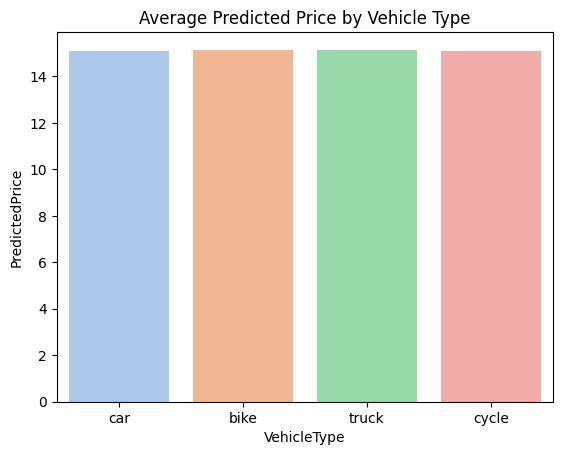

In [ ]:
# Bar Plot
sns.barplot(data=df, x='VehicleType', y='PredictedPrice', estimator=np.mean, ci=None, palette='pastel')
plt.title("Average Predicted Price by Vehicle Type")
plt.show()

/tmp/ipython-input-22-505379347.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TrafficConditionNearby', y='PredictedPrice', palette='coolwarm')


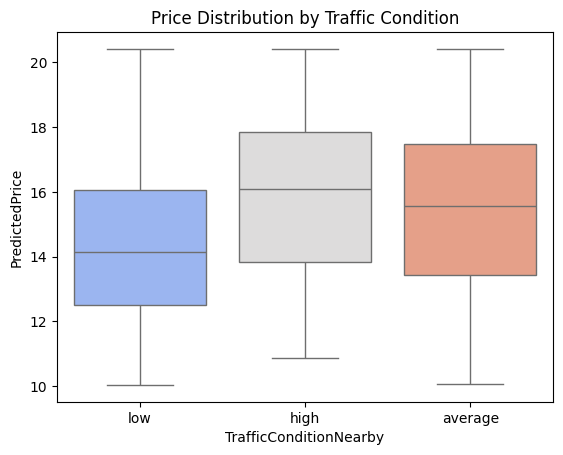

In [ ]:
# Box Plot
sns.boxplot(data=df, x='TrafficConditionNearby', y='PredictedPrice', palette='coolwarm')
plt.title("Price Distribution by Traffic Condition")
plt.show()

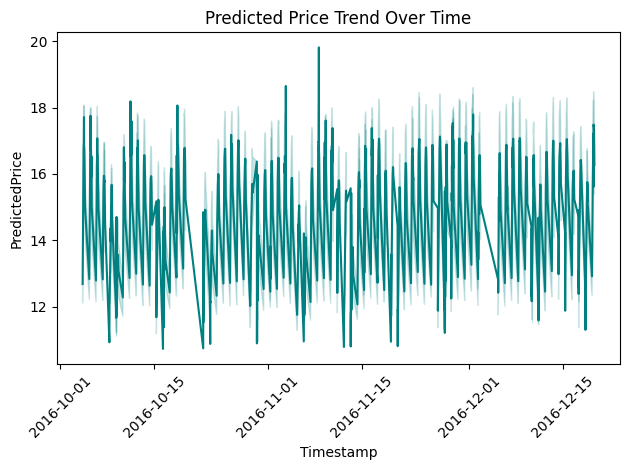

In [ ]:
# Line Plot
df_sorted = df.sort_values('Timestamp')
sns.lineplot(data=df_sorted, x='Timestamp', y='PredictedPrice', color='teal')
plt.title("Predicted Price Trend Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-24-1118854232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PriceCategory', palette='Set2')


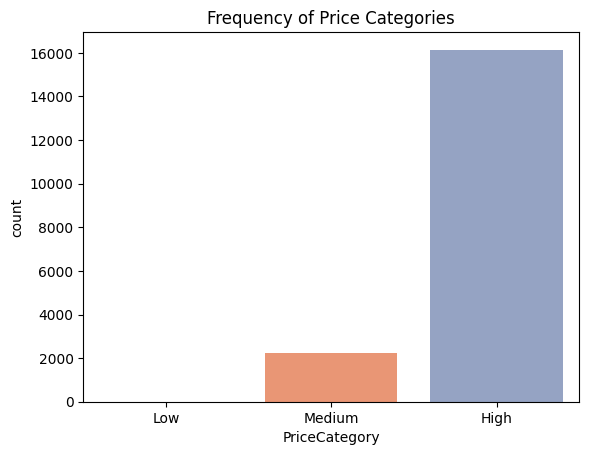

In [ ]:
# Count Plot
sns.countplot(data=df, x='PriceCategory', palette='Set2')
plt.title("Frequency of Price Categories")
plt.show()

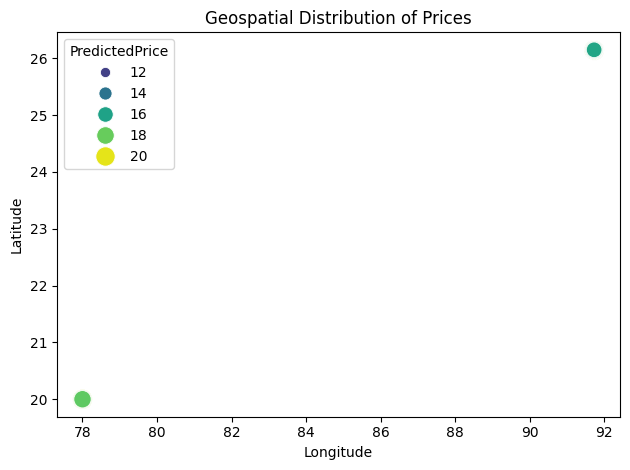

In [ ]:
# Scatter Plot
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='PredictedPrice', palette='viridis', size='PredictedPrice', sizes=(20, 200))
plt.title("Geospatial Distribution of Prices")
plt.tight_layout()
plt.show()

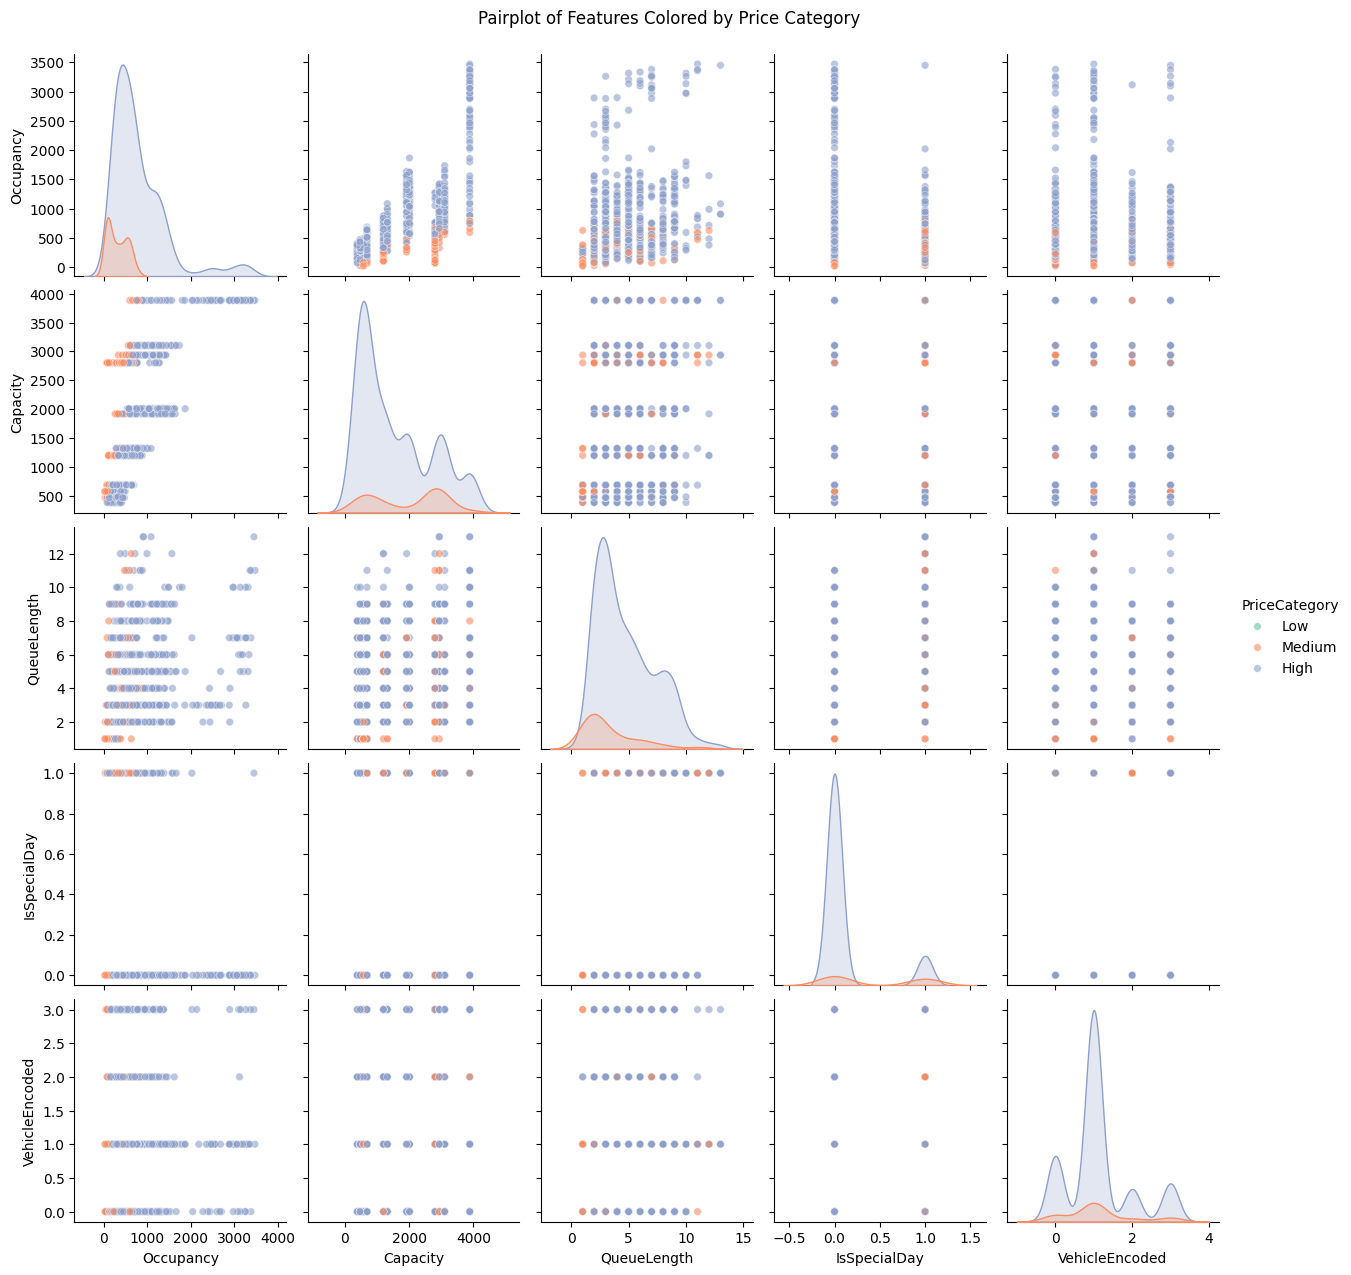

In [ ]:
# Pairplot
df_sampled = df.sample(n=1000, random_state=42) if len(df) > 1000 else df
sns.pairplot(df_sampled[features + ['PriceCategory']], hue='PriceCategory', palette='Set2', plot_kws={'alpha': 0.6, 's': 30})
plt.suptitle("Pairplot of Features Colored by Price Category", y=1.02)
plt.show()

/tmp/ipython-input-27-4058716762.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='Blues_d')


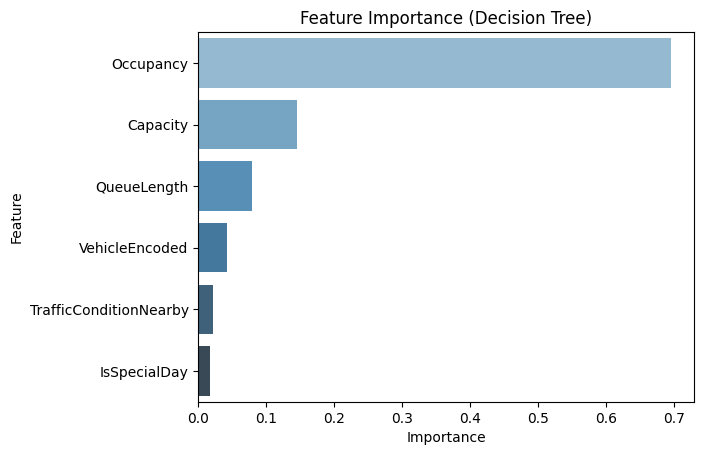

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

sns.barplot(data=feat_df, x='Importance', y='Feature', palette='Blues_d')
plt.title("Feature Importance (Decision Tree)")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_corr = df.copy()

# Encode all object-type columns in features
for col in features:
    if df_corr[col].dtype == 'object':
        df_corr[col] = LabelEncoder().fit_transform(df_corr[col].astype(str))

# Encode target
df_corr['PriceCategoryEncoded'] = LabelEncoder().fit_transform(df_corr['PriceCategory'].astype(str))

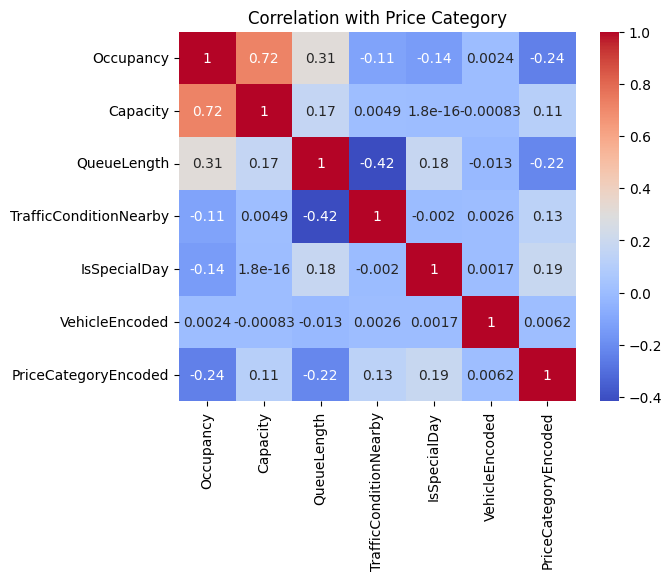

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_corr[features + ['PriceCategoryEncoded']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation with Price Category")
plt.show()

In [ ]:
class ParkingSchema(pw.Schema):
    Timestamp: str
    Occupancy: int
    Capacity: int
    QueueLength: int
    TrafficConditionNearby: int
    IsSpecialDay: int
    VehicleType: str
    Latitude: float
    Longitude: float

df_stream = df.dropna(subset=[
    'Timestamp', 'Occupancy', 'Capacity', 'QueueLength',
    'TrafficConditionNearby', 'IsSpecialDay', 'VehicleType', 'Latitude', 'Longitude'
])

df_stream[[
    "Timestamp", "Occupancy", "Capacity", "QueueLength",
    "TrafficConditionNearby", "IsSpecialDay", "VehicleType", "Latitude", "Longitude"
]].to_csv("parking_stream.csv", index=False)

data = pw.demo.replay_csv("parking_stream.csv", schema=ParkingSchema, input_rate=1000)

fmt = "%Y-%m-%d %H:%M:%S"
data_with_time = data.with_columns(
    t = data.Timestamp.dt.strptime(fmt),
    day = data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00")
)

In [ ]:
@pw.udf
def compute_price(occupancy, capacity, queue, traffic, special, vehicle):
    α, β, γ, δ, ε = 1.2, 0.8, 0.6, 2.0, 1.5
    vehicle_map = {'car': 1.0, 'bike': 0.7, 'truck': 1.3}
    vehicle_weight = vehicle_map.get(str(vehicle).lower(), 1.0)

    occupancy_rate = occupancy / capacity
    queue_ratio = queue / capacity

    demand = (
        α * occupancy_rate +
        β * queue_ratio -
        γ * traffic +
        δ * special +
        ε * vehicle_weight
    )
    norm_demand = (demand + 2) / 8
    price = 10 * (1 + 0.5 * norm_demand)
    return round(np.clip(price, 5, 20), 2)

In [ ]:
delta_window = (
    data_with_time.windowby(
        pw.this.t,
        instance=pw.this.day,
        window=pw.temporal.tumbling(datetime.timedelta(days=1)),
        behavior=pw.temporal.exactly_once_behavior()
    )
    .reduce(
        t=pw.this._pw_window_end,
        Occupancy=pw.reducers.max(pw.this.Occupancy),
        Capacity=pw.reducers.max(pw.this.Capacity),
        QueueLength=pw.reducers.max(pw.this.QueueLength),
        TrafficConditionNearby=pw.reducers.max(pw.this.TrafficConditionNearby),
        IsSpecialDay=pw.reducers.max(pw.this.IsSpecialDay),
        VehicleType=pw.reducers.min(pw.this.VehicleType)
    )
    .with_columns(
        price=compute_price(
            pw.this.Occupancy,
            pw.this.Capacity,
            pw.this.QueueLength,
            pw.this.TrafficConditionNearby,
            pw.this.IsSpecialDay,
            pw.this.VehicleType
        )
    )
)

In [ ]:
pn.extension()

def price_plotter(source):
    fig = bokeh.plotting.figure(
        height=400,
        width=800,
        title="Pathway: Daily Parking Price",
        x_axis_type="datetime"
    )
    fig.line("t", "price", source=source, line_width=2, color="navy")
    fig.circle("t", "price", source=source, size=6, color="red")
    return fig

viz = delta_window.plot(price_plotter, sorting_col="t")
pn.Column(viz).servable()

Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [ ]:
pn.serve(pn.Column(viz), show=True, start=True)

Launching server at http://localhost:42357
